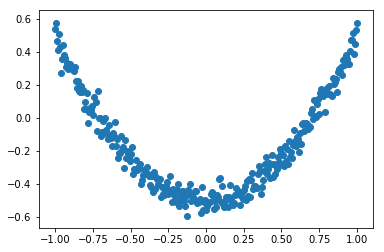

training...
removing exception


In [17]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Make up some real data
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediciton and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# important step
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)

plt.show()
plt.ion()
print("training...")
for i in range(1000):
    # training
    
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            print('removing exception')
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        print(lines)